Number of qubits: 5
Total states (N): 32
Marked states (M): 1
Optimal number of iterations: 4
        ┌───┐┌───┐ 1-Z ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐ 1-Z ┌───┐┌───┐┌───┐»
   q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├»
        ├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘»
   q_1: ┤ H ├───────■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├───────■──┤ H ├┤ X ├─────»
        ├───┤┌───┐  │  ├───┤├───┤┌───┐  │  ├───┤├───┤┌───┐  │  ├───┤├───┤┌───┐»
   q_2: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├»
        ├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘»
   q_3: ┤ H ├───────■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├───────■──┤ H ├┤ X ├─────»
        ├───┤       │  ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐  │  ├───┤├───┤┌───┐»
   q_4: ┤ H ├───────■──┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ H ├»
        └───┘          └───┘└───┘└───┘└───┘└───┘└───┘└───┘     └───┘└───┘└───┘»
meas: 5/══════════════════

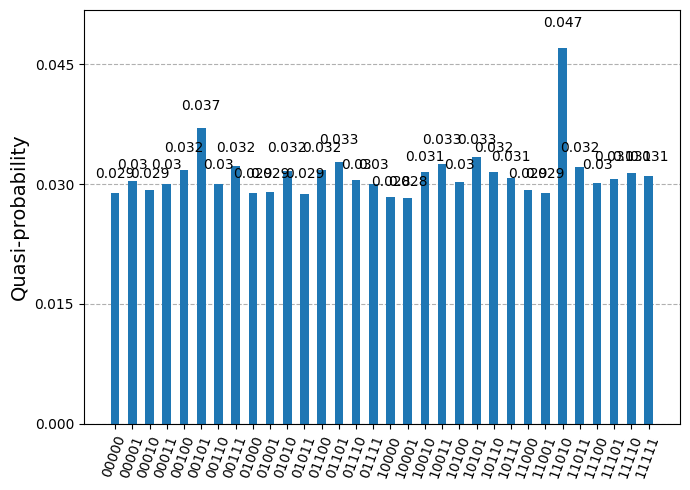

In [1]:

from Helper_Functions import Grover_oracle, Grover_operator, Get_Data_from_Fake_backend
import numpy as np
import math

from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeAlgiers
from qiskit.visualization import plot_distribution

# 1. Define the new marked state for 5 qubits
marked_states = ["11010"]

# 2. Build the oracle and operator
oracle = Grover_oracle(marked_states)
operator = Grover_operator(oracle)

# 3. Calculate optimal iterations
n = 5
M = len(marked_states)
N = 2 ** n

optimal_iterations = math.floor(math.pi / (4 * math.asin(math.sqrt(M / N))))
print(f"Number of qubits: {n}")
print(f"Total states (N): {N}")
print(f"Marked states (M): {M}")
print(f"Optimal number of iterations: {optimal_iterations}")

# 4. Build and Run the circuit
qc = QuantumCircuit(n)
qc.h(range(n))

for _ in range(optimal_iterations):
    qc.compose(operator, inplace=True)

qc.measure_all()
print(qc.draw())

# 5. Run on backend using the fake provider and 10000 shots
backend = FakeAlgiers()
data_pub = Get_Data_from_Fake_backend(100000, qc, backend)

# 6. Extract counts from the result and plot
counts = data_pub.meas.get_counts()  # <-- extract the actual counts dictionary
print(counts)
plot_distribution(counts)

Number of qubits: 5
Total states (N): 32
Marked states (M): 1
Optimal number of iterations: 4
Iteration 0: P(11010) = 0.0296  (296/10000)
Iteration 1: P(11010) = 0.1097  (1097/10000)
Iteration 2: P(11010) = 0.1012  (1012/10000)
Iteration 3: P(11010) = 0.0752  (752/10000)
Iteration 4: P(11010) = 0.0436  (436/10000)
Iteration 5: P(11010) = 0.0319  (319/10000)
Iteration 6: P(11010) = 0.0303  (303/10000)


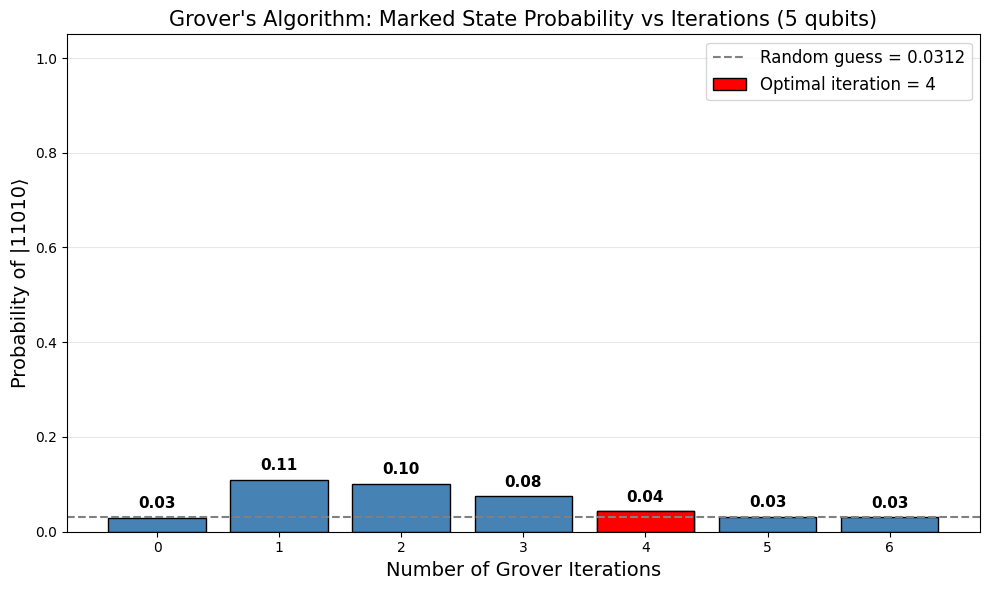

In [2]:
from Helper_Functions import Grover_oracle, Grover_operator, Get_Data_from_Fake_backend
import numpy as np
import math
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeAlgiers
from qiskit.visualization import plot_distribution

# 1. Define the new marked state for 5 qubits
marked_states = ["11010"]
target = marked_states[0]

# 2. Build the oracle and operator
oracle = Grover_oracle(marked_states)
operator = Grover_operator(oracle)

# 3. Calculate optimal iterations
n = 5
M = len(marked_states)
N = 2 ** n

optimal_iterations = math.floor(math.pi / (4 * math.asin(math.sqrt(M / N))))
print(f"Number of qubits: {n}")
print(f"Total states (N): {N}")
print(f"Marked states (M): {M}")
print(f"Optimal number of iterations: {optimal_iterations}")

# 4. Run circuit at EACH iteration and record marked state probability
backend = FakeAlgiers()
shots = 10000
iterations_to_test = range(0, optimal_iterations + 3)  # go a bit beyond optimal to see the drop
probabilities = []

for num_iters in iterations_to_test:
    # Build circuit with 'num_iters' Grover iterations
    qc = QuantumCircuit(n)
    qc.h(range(n))  # superposition

    for _ in range(num_iters):
        qc.compose(operator, inplace=True)

    qc.measure_all()

    # Run and get counts
    data_pub = Get_Data_from_Fake_backend(shots, qc, backend)
    counts = data_pub.meas.get_counts()

    # Calculate probability of the marked state
    marked_count = counts.get(target, 0)
    prob = marked_count / shots
    probabilities.append(prob)

    print(f"Iteration {num_iters}: P({target}) = {prob:.4f}  ({marked_count}/{shots})")

# 5. Plot: Marked state probability vs number of iterations
plt.figure(figsize=(10, 6))
plt.bar(list(iterations_to_test), probabilities, color='steelblue', edgecolor='black')

# Highlight the optimal iteration
plt.bar(optimal_iterations, probabilities[optimal_iterations], color='red', edgecolor='black',
        label=f'Optimal iteration = {optimal_iterations}')

# Add a horizontal line for random guess probability
random_prob = M / N
plt.axhline(y=random_prob, color='gray', linestyle='--', label=f'Random guess = {random_prob:.4f}')

# Labels and formatting
plt.xlabel('Number of Grover Iterations', fontsize=14)
plt.ylabel(f'Probability of |{target}⟩', fontsize=14)
plt.title(f"Grover's Algorithm: Marked State Probability vs Iterations ({n} qubits)", fontsize=15)
plt.xticks(list(iterations_to_test))
plt.ylim(0, 1.05)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add probability value on top of each bar
for i, (it, p) in enumerate(zip(iterations_to_test, probabilities)):
    plt.text(it, p + 0.02, f'{p:.2f}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Debugging

In [3]:
import qiskit
print(f"Qiskit version: {qiskit.__version__}")

try:
    import qiskit_aer
    print(f"Qiskit Aer version: {qiskit_aer.__version__}")
except:
    print("Qiskit Aer: NOT installed")

import qiskit_ibm_runtime
print(f"Qiskit IBM Runtime version: {qiskit_ibm_runtime.__version__}")

# Check how FakeAlgiers behaves
from qiskit_ibm_runtime.fake_provider import FakeAlgiers
backend = FakeAlgiers()

# Check if it simulates with noise or not
print(f"\nBackend: {backend.name}")
print(f"Num qubits: {backend.num_qubits}")

# Check what the Sampler actually does
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
print(f"Sampler type: {type(sampler)}")
print(f"Sampler options: {sampler.options}")

Qiskit version: 2.3.0
Qiskit Aer version: 0.17.2
Qiskit IBM Runtime version: 0.45.1

Backend: fake_algiers
Num qubits: 27
Sampler type: <class 'qiskit_ibm_runtime.sampler.SamplerV2'>
Sampler options: SamplerOptions(_VERSION=2, max_execution_time=Unset, environment=EnvironmentOptions(log_level='WARNING', job_tags=None, private=False), simulator=SimulatorOptions(noise_model=Unset, seed_simulator=Unset, coupling_map=Unset, basis_gates=Unset), default_shots=Unset, dynamical_decoupling=DynamicalDecouplingOptions(enable=Unset, sequence_type=Unset, extra_slack_distribution=Unset, scheduling_method=Unset, skip_reset_qubits=Unset), execution=SamplerExecutionOptionsV2(init_qubits=Unset, rep_delay=Unset, meas_type=Unset), twirling=TwirlingOptions(enable_gates=Unset, enable_measure=Unset, num_randomizations=Unset, shots_per_randomization=Unset, strategy=Unset), experimental=Unset)


In [4]:
from Helper_Functions import Grover_oracle, Grover_operator
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeAlgiers
from qiskit_ibm_runtime import SamplerV2 as Sampler
import math

# Build the circuit
marked_states = ["11010"]
oracle = Grover_oracle(marked_states)
operator = Grover_operator(oracle)

n = 5
qc = QuantumCircuit(n)
qc.h(range(n))
for _ in range(4):
    qc.compose(operator, inplace=True)
qc.measure_all()

# Transpile and check
backend = FakeAlgiers()
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

print(f"Original circuit: {qc.num_qubits} qubits, {qc.count_ops()} gates")
print(f"Transpiled circuit: {isa_circuit.num_qubits} qubits")
print(f"Transpiled gate count: {sum(isa_circuit.count_ops().values())} total gates")
print(f"Transpiled gate types: {isa_circuit.count_ops()}")
print(f"Circuit depth: {isa_circuit.depth()}")

# Check which physical qubits are used
layout = isa_circuit.layout
if layout and layout.initial_layout:
    print(f"Qubit mapping: {layout.initial_layout}")

Original circuit: 5 qubits, OrderedDict({'x': 56, 'h': 53, 'measure': 5, 'mcmt': 4, 'mcx': 4, 'barrier': 1}) gates
Transpiled circuit: 27 qubits
Transpiled gate count: 1083 total gates
Transpiled gate types: OrderedDict({'cx': 539, 'rz': 441, 'sx': 93, 'measure': 5, 'x': 4, 'barrier': 1})
Circuit depth: 802
Qubit mapping: Layout({
3: <Qubit register=(5, "q"), index=0>,
0: <Qubit register=(5, "q"), index=1>,
4: <Qubit register=(5, "q"), index=2>,
1: <Qubit register=(5, "q"), index=3>,
2: <Qubit register=(5, "q"), index=4>,
8: <Qubit register=(22, "ancilla"), index=0>,
24: <Qubit register=(22, "ancilla"), index=1>,
5: <Qubit register=(22, "ancilla"), index=2>,
9: <Qubit register=(22, "ancilla"), index=3>,
22: <Qubit register=(22, "ancilla"), index=4>,
11: <Qubit register=(22, "ancilla"), index=5>,
15: <Qubit register=(22, "ancilla"), index=6>,
6: <Qubit register=(22, "ancilla"), index=7>,
7: <Qubit register=(22, "ancilla"), index=8>,
14: <Qubit register=(22, "ancilla"), index=9>,
12: <Qu

In [5]:
from qiskit_ibm_runtime.fake_provider import FakeAlgiers
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit import QuantumCircuit

backend = FakeAlgiers()

# Simple test: make a circuit that SHOULD give "0" 100% of the time
# If noise exists, we'll see some "1" results
qc = QuantumCircuit(1)
qc.measure_all()

# Run it
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa = pm.run(qc)

sampler = Sampler(mode=backend)
result = sampler.run([isa], shots=10000).result()
counts = result[0].data.meas.get_counts()

print(f"Counts: {counts}")
print(f"P(0): {counts.get('0', 0) / 10000:.4f}")
print(f"P(1): {counts.get('1', 0) / 10000:.4f}")

if counts.get('1', 0) > 0:
    print("\n✅ NOISE IS ON — readout errors detected")
    print(f"   Readout error rate ≈ {counts.get('1', 0) / 10000:.4f}")
else:
    print("\n❌ NOISE IS OFF — this platform is running ideal simulation!")
    print("   That's why you get P ≈ 0.99")

Counts: {'0': 9920, '1': 80}
P(0): 0.9920
P(1): 0.0080

✅ NOISE IS ON — readout errors detected
   Readout error rate ≈ 0.0080
